# Imports

In [18]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

# Pull Data from Excel File

In [2]:
df = pd.read_excel('NFLCombineStats.xlsx')
df = df.dropna(axis=0) # Drop incomplete entries
df = df[df.Pos != 'Quarterback'] # Only 1 QB, so remove
df = df.replace('OL', 0)
df = df.replace('C', 0)
df = df.replace('OT', 0)
df = df.replace('OG', 0)
df = df.replace('LS', 0)
df = df.replace('RB', 1)
df = df.replace('FB', 1)
df = df.replace('WR', 2)
df = df.replace('TE', 3)
df = df[df.Pos != 'QB'] # Only 8 QBs, so removed
df = df.replace('QB', 4) 
df = df.replace('DL', 5)
df = df.replace('DT', 5)
df = df.replace('DE', 5)
df = df.replace('EDGE', 5)
df = df.replace('LB', 6)
df = df.replace('ILB', 6)
df = df.replace('OLB', 6)
df = df.replace('CB', 7)
df = df.replace('S', 8)
df = df.replace('FS', 8)
df = df.replace('SS', 8)
data = df.as_matrix()
data.shape

(1505, 13)

In [3]:
x = data[:, 4:13]
y = data[:, 1].astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [4]:
counts = {}
for i in range(len(y)):
    counts[y[i]] = counts.get(y[i], 0) + 1
print(counts)

{0: 240, 7: 172, 5: 290, 1: 172, 8: 113, 6: 193, 3: 91, 2: 234}


# Prior to Hyperparameter Tuning

In [105]:
# RANDOM FOREST
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.991694352159
0.810631229236


In [124]:
# SUPPORT VECTOR CLASSIFIER
clf = SVC()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.975913621262
0.491694352159


In [125]:
# NEURAL NET
clf = MLPClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.444352159468
0.401993355482


# Hyperparameter Tuning

### Random Forest Classifier

In [99]:
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
max_depth.append(None)
rfc_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 4, 6, 8, 10],
               'min_samples_leaf': [2, 4, 6, 8, 10]}
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator=rfc,param_distributions=rfc_random_grid,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rfc_random.fit(x_train, y_train)
rfc_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished


{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [103]:
rfc_search_grid = {
    'max_depth': [20, 25, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [450, 475, 500, 525, 550, 575, 600]}
rfc_grid = GridSearchCV(estimator=rfc,param_grid=rfc_search_grid,cv=10,n_jobs=-1,verbose = 2)
rfc_grid.fit(x_train, y_train)
rfc_grid.best_params_

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  4.3min finished


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 550}

In [104]:
rfc_best_model = rfc_grid.best_estimator_
y_pred = rfc_best_model.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = rfc_best_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.96096345515
0.87707641196


### Support Vector Classifier

In [106]:
svc_random_grid = {
    'C': [1e-2, 1e-1, 1, 1e1, 1e2],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': [1e-2, 1e-1, 1, 1e1, 1e2]}
svc = SVC()
svc_random = RandomizedSearchCV(estimator=svc, param_distributions=svc_random_grid, n_iter=25,
                                 cv=10, verbose=2, n_jobs=-1)
svc_random.fit(x_train, y_train)
svc_random.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.7s finished


{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [108]:
svc_search_grid = {
    'C': [80, 90, 100, 110, 120],
    'kernel': ['rbf'],
    'gamma': [0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]}
svc_grid = GridSearchCV(estimator=svc,param_grid=svc_search_grid,cv=10,n_jobs=-1,verbose = 2)
svc_grid.fit(x_train, y_train)
svc_grid.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   10.1s finished


{'C': 80, 'gamma': 0.007, 'kernel': 'rbf'}

In [109]:
svc_best_model = svc_grid.best_estimator_
y_pred = svc_best_model.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = svc_best_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.974252491694
0.790697674419


### Neural Network

In [117]:
nnc_search_grid = {
        'hidden_layer_sizes': [(10, 10), (10, 50), (10, 100),
                               (50, 10), (50, 50), (50, 100),
                              (100, 10), (100, 50), (100, 100)],
        'activation': ['identity', 'logistic', 'tanh'],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}
nnc = MLPClassifier()
nnc_random = RandomizedSearchCV(estimator=nnc, param_distributions=nnc_search_grid, n_iter=75,
                                 cv=10, verbose=2, n_jobs=-1)
nnc_random.fit(x_train, y_train)
nnc_random.best_params_

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.0min finished


{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'invscaling'}

In [119]:
nnc_search_grid = {
    'hidden_layer_sizes': [(75, 25), (75, 50), (75, 75), (100, 25), (100, 50), (100, 75), (125, 25), (125, 50), (125, 75)],
    'activation': ['tanh'],
    'learning_rate': ['constant', 'invscaling'],
    'alpha': [0.08, 0.09, 0.1, 0.2, 0.3]}
nnc_grid = GridSearchCV(estimator=nnc, param_grid=nnc_search_grid, cv=10, verbose=2, n_jobs=-1)
nnc_grid.fit(x_train, y_train)
nnc_grid.best_params_

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.1min finished


{'activation': 'tanh',
 'alpha': 0.2,
 'hidden_layer_sizes': (125, 25),
 'learning_rate': 'invscaling'}

In [120]:
nnc_best_model = nnc_grid.best_estimator_
y_pred = nnc_best_model.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred = nnc_best_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.547342192691
0.524916943522


# Comparing Algorithms

In [121]:
models = []
models.append(('RFC', rfc_best_model))
models.append(('SVC', svc_best_model))
models.append(('NNC', nnc_best_model))

RFC: Mean=0.764671 STD=0.085989
SVC: Mean=0.695638 STD=0.076755
NNC: Mean=0.627152 STD=0.192987


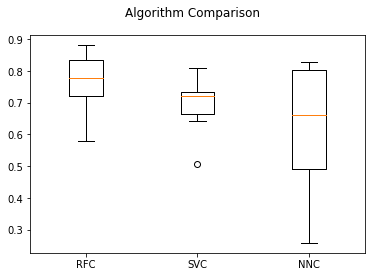

In [123]:
results = []
names = []
scoring = 'accuracy'
for model_name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(model_name)
    print("%s: Mean=%f STD=%f" % (model_name, cv_results.mean(), cv_results.std()))
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()